<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/GACR_Regresion_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Analytics Customer Revenue

In [34]:
# librerias
# gestión de datos
import numpy as np
import pandas as pd

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#libreria estadistica
from scipy import stats
from datetime import datetime







In [3]:
#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#leemos el fichero IMDB
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/df_regression_1023.csv")
# Cargar archivo CSV como DataFrame ver los 5 primero registros
df.head(5)

Mounted at /content/drive


<ipython-input-3-9dda76c4b8d8>:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/df_regression_1023.csv")


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,channelGrouping,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,...,geoNetwork.country,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.bounces,totals.newVisits,totals.transactionRevenue
0,0,0,1,Organic Search,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,...,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
1,1,1,2,Organic Search,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,...,Spain,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
2,2,2,3,Organic Search,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,...,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
3,3,3,7,Organic Search,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,...,Australia,not available in demo dataset,bigpond.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN
4,4,4,9,Organic Search,9499785259412240342,9499785259412240342_1472812272,Not Socially Engaged,1472812272,1,1472812272,...,Netherlands,not available in demo dataset,chello.nl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,NaN


# Data Understanding

In [4]:
#Tamaño de Dataset
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270850 entries, 0 to 270849
Columns: 37 entries, Unnamed: 0.2 to totals.transactionRevenue
dtypes: bool(1), float64(3), int64(7), object(26)
memory usage: 74.6+ MB


In [5]:
df.head().T

,0,1,2,3,4
Unnamed: 0.2,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
Unnamed: 0,1,2,3,7,9
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
fullVisitorId,377306020877927890,3895546263509774583,4763447161404445595,537222803633850821,9499785259412240342
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,537222803633850821_1472812602,9499785259412240342_1472812272
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472865386,1472881213,1472812602,1472812272
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472865386,1472881213,1472812602,1472812272


In [6]:
df=df.loc[:,~df.columns.str.contains('Unnamed')].copy()
#Quitar todas estas Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0
df.head(2).T

,0,1
channelGrouping,Organic Search,Organic Search
fullVisitorId,377306020877927890,3895546263509774583
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386
socialEngagementType,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472865386
visitNumber,1,1
visitStartTime,1472880147,1472865386
device.browser,Firefox,Chrome
device.browserVersion,not available in demo dataset,not available in demo dataset
device.browserSize,not available in demo dataset,not available in demo dataset


In [7]:
#Tratamiento id. borramos info redundandan
df_ids=['fullVisitorId', 'visitId']


In [8]:
# Eliminar las columnas
df.drop(df_ids, axis=1, inplace=True)

In [9]:
TARGET = 'totals.transactionRevenue'

Tipo de Atributos

In [10]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
visitNumber,270850.0,2.243275e+00,8.912507e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.930000e+02
visitStartTime,270850.0,1.485001e+09,9.014480e+06,1.470035e+09,1.477564e+09,1.483927e+09,1.492743e+09,1.501657e+09
totals.visits,270850.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.bounces,135326.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.newVisits,210508.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.transactionRevenue,3427.0,1.382343e+08,5.648006e+08,4.000000e+04,2.448500e+07,4.822000e+07,1.059300e+08,2.312950e+10


In [11]:
#bounces tiene 0 desviacion, pero tiene nulos --> buleana de nulo o no nulo, mismo con newVisits

In [12]:
df.describe(exclude=np.number).T
#Todas las q tienen una unique	 no nos vale, no aportan valor

,count,unique,top,freq
channelGrouping,270850,8,Organic Search,114313
sessionId,270850,270774,4491333099755680268_1476946205,2
socialEngagementType,270850,1,Not Socially Engaged,270850
device.browser,270850,37,Chrome,186001
device.browserVersion,270850,1,not available in demo dataset,270850
device.browserSize,270850,1,not available in demo dataset,270850
device.operatingSystemVersion,270850,1,not available in demo dataset,270850
device.isMobile,270850,2,False,199280
device.mobileDeviceBranding,270850,1,not available in demo dataset,270850
device.mobileDeviceModel,270850,1,not available in demo dataset,270850


Eliminar variables con poca o nula varianza

In [13]:
df['device.screenResolution'].nunique(dropna=False)

1

In [14]:
#Funcion q diga todas las q tiene un solo unique
constant_columns =[column for column in df.columns if df[column].nunique(dropna=False)==1]
#hago la lista, reviso veo q esta correcto y despues elimino
df.drop(constant_columns, axis=1, inplace=True)

In [15]:
df_description=df.describe(include='all').T

Analisis del Target

In [16]:
df[TARGET].head()
#si hay nulos no sirve, los nulos en realidad son 0, donde no ha habido compra.

,totals.transactionRevenue
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [17]:
df[df[TARGET].notnull()].describe().T
#Los nulos son en realidad sin compra no son nulos reales.

,count,mean,std,min,25%,50%,75%,max
visitNumber,3427.0,4.327400e+00,1.445595e+01,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,3.150000e+02
visitStartTime,3427.0,1.485799e+09,9.252084e+06,1.470057e+09,1.478101e+09,1.485458e+09,1.493851e+09,1.501631e+09
totals.bounces,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totals.newVisits,1330.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.transactionRevenue,3427.0,1.382343e+08,5.648006e+08,4.000000e+04,2.448500e+07,4.822000e+07,1.059300e+08,2.312950e+10


In [18]:
df[df[TARGET].notnull()][TARGET]
#traes muxos 0 q no son reales. los datos de google vienen con *100000

,totals.transactionRevenue
259,8380000.0
277,81500000.0
288,63840000.0
289,43710000.0
295,35390000.0
...,...
270715,135920000.0
270720,23180000.0
270724,22970000.0
270731,12990000.0


In [19]:
df[TARGET]=df[TARGET].astype(float)

In [20]:
df[TARGET].describe()


,totals.transactionRevenue
count,3.427000e+03
mean,1.382343e+08
std,5.648006e+08
min,4.000000e+04
25%,2.448500e+07
50%,4.822000e+07
75%,1.059300e+08
max,2.312950e+10


In [22]:
# Rellenar los valores faltantes en la columna objetivo con 0
df[TARGET].fillna(0, inplace=True)

<ipython-input-22-784a875ce1e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[TARGET].fillna(0, inplace=True)


In [23]:
df[TARGET].describe()

,totals.transactionRevenue
count,2.708500e+05
mean,1.749045e+06
std,6.537418e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.312950e+10


In [ ]:
# q el pct 75= pct 50 pct 25 min, me indica q la distribucion es separada a la izquierda

In [24]:

df[TARGET]=df[TARGET]/100000

In [25]:
df[df[TARGET]>0][TARGET].describe()

,totals.transactionRevenue
count,3427.000000
mean,1382.342924
std,5648.005901
min,0.400000
25%,244.850000
50%,482.200000
75%,1059.300000
max,231295.000000


In [26]:
df['visitWithTransaction']=(df[TARGET]>0).astype(int)

In [28]:
df['visitWithTransaction'].mean()*100
#la cantidad q terminan el compar

1.2652759830164297

<ipython-input-36-49f96d6a8e7a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['visitWithTransaction']==1] [TARGET], fit=stats.norm)


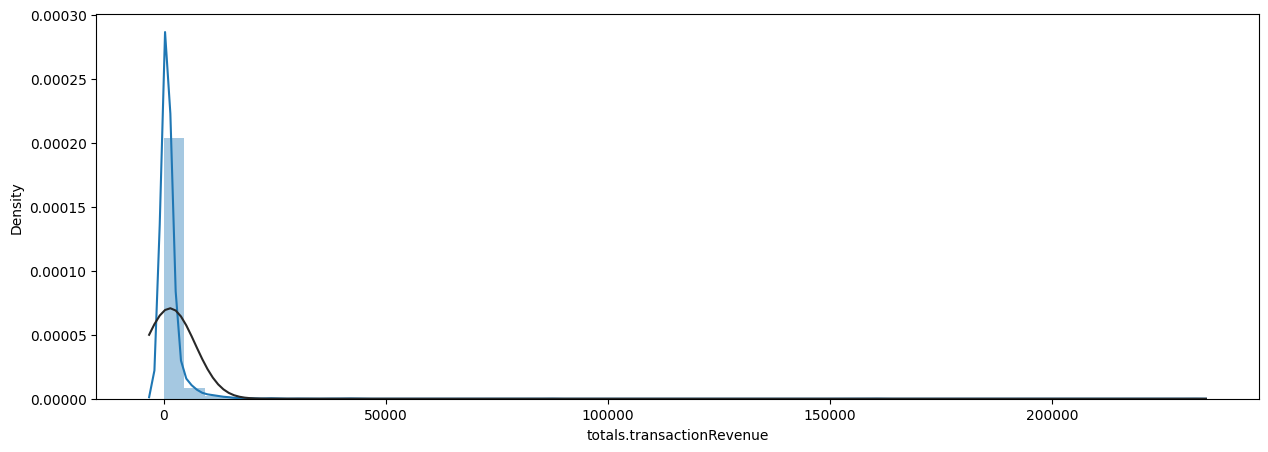

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['visitWithTransaction']==1] [TARGET], fit=stats.norm)
plt.show()

El TARGET no es normal puede tener outlier y me interesa q no esten. Porq voy a usar una tegresion lineal. Por lo tnato voy a usar transformacion logaritmica

In [38]:
df['totals.transactionRevenue'].head()

,totals.transactionRevenue
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


La función np.log1p se utiliza comúnmente en el preprocesamiento de datos para la regresión, especialmente cuando la variable objetivo (en este caso, los ingresos por transacción) tiene las siguientes características

In [37]:
df['totals.transactionRevenue']=df[TARGET].apply(np.log1p)
# Aplicar la transformación log1p

In [39]:
TARGET_LOG = 'totals.transactionRevenue_log'

In [42]:
plt.figure(figsize=(15, 5))
sns.distplot(df[TARGET_LOG])  # Usa TARGET, no TARGET_LOG
plt.show()

KeyError: 'totals.transactionRevenue_log'

<Figure size 1500x500 with 0 Axes>

In [43]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['visitWithTransaction']==1] [TARGET_LOG], fit=stats.norm)
plt.show()

KeyError: 'totals.transactionRevenue_log'

<Figure size 1500x500 with 0 Axes>